# Task 5 — Strategy Backtesting

This notebook backtests the **Task 4 optimized portfolio** against a **60% SPY / 40% BND** benchmark using the last year of data (Jan 2025–Jan 2026).

## Rubric mapping
- **(a)** Backtesting period: Jan 2025–Jan 2026 (out-of-sample)
- **(b)** Benchmark: static 60/40 SPY/BND
- **(c)** Strategy simulation: monthly hold + rebalance to Task 4 target weights (advanced) or simple hold
- **(d)** Cumulative returns plot
- **(e)** Metrics: total return, annualized return, Sharpe, max drawdown
- **(f)** Conclusion + limitations (1–2 paragraphs)


In [1]:
import os, sys, subprocess
from pathlib import Path
import pandas as pd

def find_repo_root(start: Path | None = None) -> Path:
    cur = (start or Path.cwd()).resolve()
    for _ in range(10):
        if (cur / 'src').exists() and (cur / 'data').exists():
            return cur
        cur = cur.parent
    raise RuntimeError('Could not auto-detect repo root. Run from inside the repo.')

REPO_ROOT = find_repo_root(Path.cwd())
print('Notebook working directory:', os.getcwd())
print('Repo root:', REPO_ROOT)

if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))


Notebook working directory: d:\Python\Week 9\portfolio-optimization\notebooks
Repo root: D:\Python\Week 9\portfolio-optimization


## 1) Verify required inputs exist

In [2]:
from src import task5_config as cfg

required = [REPO_ROOT / cfg.RETURNS_PATH, REPO_ROOT / cfg.TASK4_SUMMARY_PATH]
missing = [p for p in required if not p.exists()]
for p in required:
    print('OK' if p.exists() else 'MISSING', p)
if missing:
    raise FileNotFoundError('Missing required files:\n' + '\n'.join(map(str, missing)))

print('\nBacktest window:', cfg.BACKTEST_START, 'to', cfg.BACKTEST_END)
print('Benchmark weights:', cfg.BENCHMARK_WEIGHTS)
print('Strategy mode:', cfg.REBALANCE_MODE)


OK D:\Python\Week 9\portfolio-optimization\data\task1\processed\returns.parquet
OK D:\Python\Week 9\portfolio-optimization\outputs\task4\task4_summary.json

Backtest window: 2025-01-01 to 2026-01-31
Benchmark weights: {'SPY': 0.6, 'BND': 0.4, 'TSLA': 0.0}
Strategy mode: monthly


## 2) Run the backtest script

In [3]:
def run(cmd):
    print('Running:', ' '.join(cmd))
    subprocess.check_call(cmd, cwd=str(REPO_ROOT))

run([sys.executable, 'scripts/task5_backtest.py'])
print('Task 5 complete.')


Running: d:\Python\Week 9\portfolio-optimization\Menv\Scripts\python.exe scripts/task5_backtest.py
Task 5 complete.


## 3) Deliverable: cumulative returns comparison plot (rubric d)

OK D:\Python\Week 9\portfolio-optimization\outputs\task5\figures\cumulative_returns_strategy_vs_benchmark.png


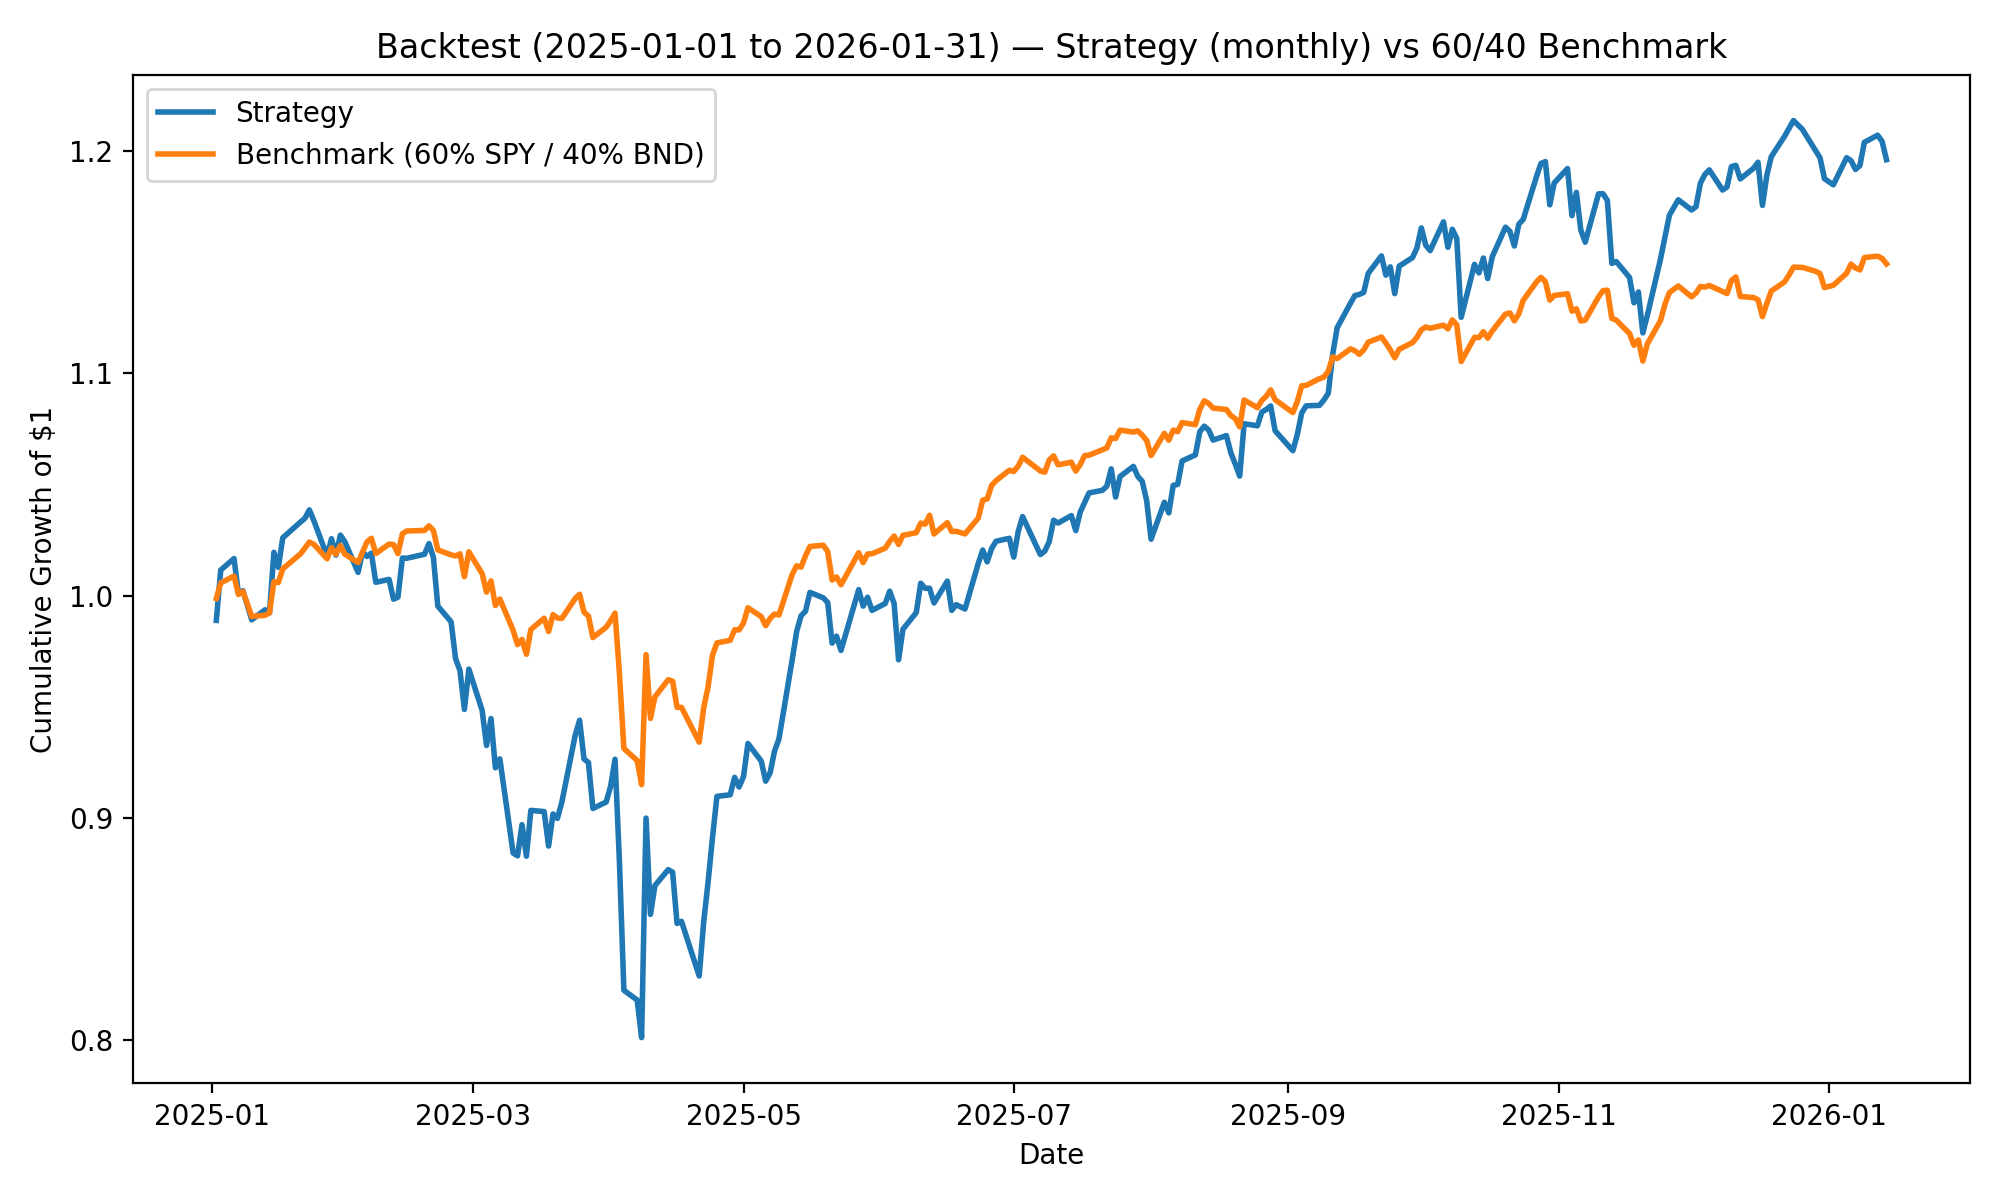

In [4]:
from IPython.display import Image, display

fig = REPO_ROOT / 'outputs' / 'task5' / 'figures' / 'cumulative_returns_strategy_vs_benchmark.png'
print('OK' if fig.exists() else 'MISSING', fig)
if fig.exists():
    display(Image(filename=str(fig)))


## 4) Deliverable: performance metrics table (rubric e)

In [5]:
metrics_path = REPO_ROOT / 'outputs' / 'task5' / 'tables' / 'performance_metrics.csv'
print('OK' if metrics_path.exists() else 'MISSING', metrics_path)
if metrics_path.exists():
    display(pd.read_csv(metrics_path))


OK D:\Python\Week 9\portfolio-optimization\outputs\task5\tables\performance_metrics.csv


,portfolio,total_return,annualized_return,annualized_volatility,sharpe,max_drawdown
0,strategy,0.196080,0.190306,0.237228,0.767782,-0.228577
1,benchmark_60_40,0.149208,0.144897,0.117967,1.037818,-0.112888


## 5) Deliverable: written conclusion (rubric f)

In [6]:
conclusion_path = REPO_ROOT / 'outputs' / 'task5' / 'summaries' / 'conclusion.md'
print('OK' if conclusion_path.exists() else 'MISSING', conclusion_path)
if conclusion_path.exists():
    print(conclusion_path.read_text(encoding='utf-8'))


OK D:\Python\Week 9\portfolio-optimization\outputs\task5\summaries\conclusion.md
## Conclusion (Backtest: monthly)

Over the backtest window, the strategy **outperformed** the 60/40 benchmark on total return (19.61% vs 14.92%). The strategy’s Sharpe ratio and maximum drawdown provide additional context for risk-adjusted performance and downside risk.

Limitations: this is a simplified backtest using daily returns with (optional) stylized rebalancing and no/slim transaction costs. It does not model slippage, bid–ask spreads, taxes, or realistic execution timing. Results are sensitive to the chosen backtest window and to estimation error in expected returns and covariances (especially with a forecast-based view on TSLA). A more robust evaluation would include multiple windows, transaction-cost sensitivity, and stress/regime analysis.



## 6) Deliverables checklist

- Plot: `outputs/task5/figures/cumulative_returns_strategy_vs_benchmark.png`
- Metrics: `outputs/task5/tables/performance_metrics.csv`
- Daily series (audit): `outputs/task5/tables/backtest_daily_series.csv`
- Conclusion: `outputs/task5/summaries/conclusion.md`
- Summary JSON: `outputs/task5/task5_summary.json`
- (Optional) Turnover: `outputs/task5/tables/turnover.csv`
- (Optional) Rebalance dates: `outputs/task5/tables/rebalance_dates.csv`
